In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
data = pd.read_csv("Student_Performance.csv")
print(data.head())


   student_id  age  gender school_type parent_education  study_hours  \
0           1   14    male      public    post graduate          3.1   
1           2   18  female      public         graduate          3.7   
2           3   17  female     private    post graduate          7.9   
3           4   16   other      public      high school          1.1   
4           5   16  female      public      high school          1.3   

   attendance_percentage internet_access travel_time extra_activities  \
0                   84.3             yes     <15 min              yes   
1                   87.8             yes     >60 min               no   
2                   65.5              no     <15 min               no   
3                   58.1              no   15-30 min               no   
4                   61.0             yes   30-60 min              yes   

  study_method  math_score  science_score  english_score  overall_score  \
0        notes        42.7           55.4           5

In [8]:
grouped = data.groupby('final_grade')['overall_score'].sum()
print(grouped)

final_grade
a    118532.1
b    240901.9
c    476456.5
d    394567.4
e    270913.7
f     98782.7
Name: overall_score, dtype: float64


In [12]:
data['result'] = data['final_grade'].apply(lambda x: 'Yes'
                                           if x in ['a','b','c','d','e'] else 'No')

In [14]:
data.isnull().sum()

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
result                   0
dtype: int64

In [10]:
data.dtypes

student_id                 int64
age                        int64
gender                       str
school_type                  str
parent_education             str
study_hours              float64
attendance_percentage    float64
internet_access              str
travel_time                  str
extra_activities             str
study_method                 str
math_score               float64
science_score            float64
english_score            float64
overall_score            float64
final_grade                  str
dtype: object

In [4]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  str    
 3   school_type            25000 non-null  str    
 4   parent_education       25000 non-null  str    
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  str    
 8   travel_time            25000 non-null  str    
 9   extra_activities       25000 non-null  str    
 10  study_method           25000 non-null  str    
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  final_grade  

Mae: On average dff by 6.56
Mse: On average dff by 64.36
rmse: On average dff by 8.02
R^2 score (model Accuracy) -8.6565


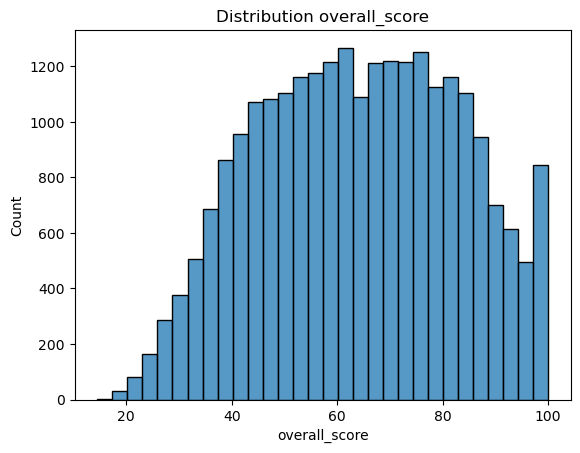

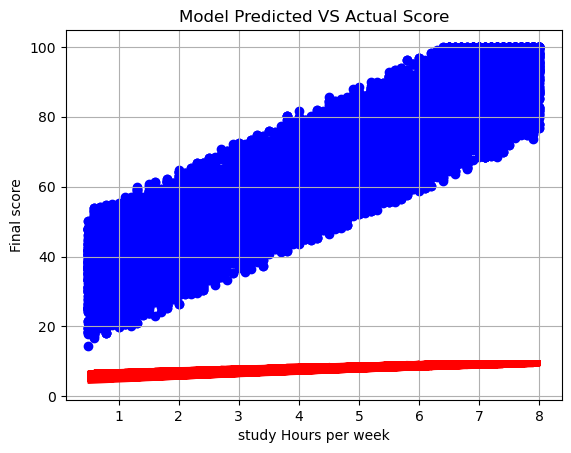

predicated overal score for 9 hours is [[101.55938042]]


/home/aditya/numpy/.conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
X = data[['study_hours']]
y= data[['overall_score']]

model  = LinearRegression()
model.fit(X,y)
predicated_score = model.predict(X)

mae = mean_absolute_error(y,predicated_score)
mse = mean_squared_error(y,predicated_score)
rmse = np.sqrt(y,predicated_score)
r2 = r2_score(y,predicated_score)

rmse = np.sqrt(mse)
print("Mae: On average dff by",round(mae,2))
print("Mse: On average dff by",round(mse,2))
print("rmse: On average dff by",round(rmse,2))
print("R^2 score (model Accuracy)",round(r2,4))

plt.Figure(figsize=(10,6))
sns.histplot(data['overall_score'],bins=30)
plt.title("Distribution overall_score")
plt.show()
plt.Figure(figsize=(10,6))
plt.scatter(X,y, color = 'blue',label='Actual score')
plt.plot(X, predicated_score, color="red",label="prediction Score (Regression Line)")
plt.title("Model Predicted VS Actual Score")
plt.xlabel('study Hours per week')
plt.ylabel("Final score")
plt.grid(True)
plt.show()

new_score = 9
predicated_new_score= model.predict([[new_score]])
print(f"predicated overal score for {new_score} hours is {predicated_new_score}")

Data_type_Encoding
   student_id  age  gender school_type parent_education  study_hours  \
0           1   14    male      public    post graduate          3.1   
1           2   18  female      public         graduate          3.7   
2           3   17  female     private    post graduate          7.9   
3           4   16   other      public      high school          1.1   
4           5   16  female      public      high school          1.3   

   attendance_percentage internet_access travel_time extra_activities  \
0                   84.3             yes     <15 min              yes   
1                   87.8             yes     >60 min               no   
2                   65.5              no     <15 min               no   
3                   58.1              no   15-30 min               no   
4                   61.0             yes   30-60 min              yes   

  study_method  math_score  science_score  english_score  overall_score  \
0        notes        42.7        

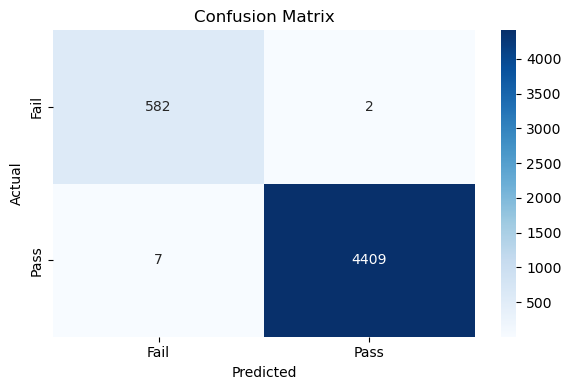

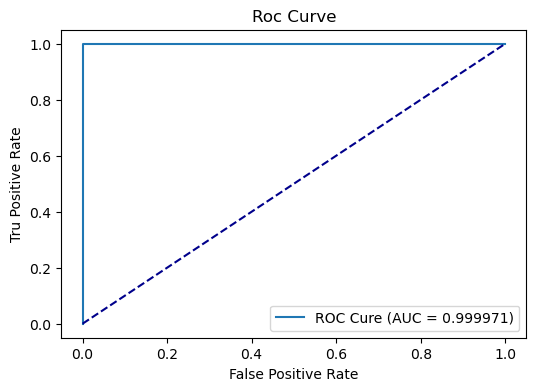

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,auc

le = LabelEncoder()
data['result'] = le.fit_transform(data['result'])

print('Data_type_Encoding')
print(data.head())


fetures = ['study_hours','attendance_percentage','overall_score']
X = data[fetures]#fetures
y = data['result']#target


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model =LogisticRegression()
model.fit(X_train_scaled,y_train)
y_probs=model.predict_proba(X_test_scaled)[:,1]


y_pred = model.predict(X_test_scaled)
fpr,tpr,thresholds = roc_curve(y_test,y_probs)
roc_auc_score = auc(fpr,tpr)

print("classification_report",)
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True, fmt="d" ,cmap="Blues",
            xticklabels=["Fail","Pass"],yticklabels=["Fail","Pass"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f'ROC Cure (AUC = {roc_auc_score:4f})')
plt.plot([0,1],[0,1],color= 'darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Positive Rate')
plt.title("Roc Curve")
plt.legend()
plt.show()



